<a href="https://colab.research.google.com/github/cxbxmxcx/Evolutionary-Deep-Learning/blob/main/EDL_4_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Source: https://github.com/DEAP/deap/blob/master/examples/ga/onemax_numpy.py

DEAP is free software: you can redistribute it and/or modify
   it under the terms of the GNU Lesser General Public License as
   published by the Free Software Foundation, either version 3 of
   the License, or (at your option) any later version.

   DEAP is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
   GNU Lesser General Public License for more details.
   You should have received a copy of the GNU Lesser General Public
   License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

In [ ]:
#@title Install DEAP
!pip install deap --quiet

     |████████████████████████████████| 163kB 8.2MB/s 


In [ ]:
#@title Imports
import operator
import random
import math
import time

import numpy as np

from deap import base
from deap import benchmarks
from deap import creator
from deap import tools
from IPython.display import clear_output

In [ ]:
#@title Setup Fitness Criteria
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Particle", np.ndarray, fitness=creator.FitnessMax, speed=list, 
    smin=None, smax=None, best=None)

In [ ]:
#@title PSO Functions
def generate(size, pmin, pmax, smin, smax):
  part = creator.Particle(np.random.uniform(pmin, pmax, size)) 
  part.speed = np.random.uniform(smin, smax, size)
  part.smin = smin
  part.smax = smax
  return part

def updateParticle(part, best, phi1, phi2):
  u1 = np.random.uniform(0, phi1, len(part))
  u2 = np.random.uniform(0, phi2, len(part))
  v_u1 = u1 * (part.best - part)
  v_u2 = u2 * (best - part)
  part.speed += v_u1 + v_u2
  for i, speed in enumerate(part.speed):
    if abs(speed) < part.smin:
      part.speed[i] = math.copysign(part.smin, speed)
    elif abs(speed) > part.smax:
      part.speed[i] = math.copysign(part.smax, speed)
  part += part.speed

In [ ]:
#@title Evaluation Function
distance = 575 #@param {type:"slider", min:10, max:1000, step:5}
def evaluate(individual):
  v = individual[0] if individual[0] > 0 else 0  #velocity
  a = individual[1] * math.pi / 180  #angle to radians
  return ((2*v**2 * math.sin(a) * math.cos(a))/9.8 - distance)**2,

In [ ]:
#@title Add Functions to Toolbox
toolbox = base.Toolbox()
toolbox.register("particle", 
                 generate, size=2, pmin=-6, pmax=6, smin=-3, smax=3)
toolbox.register("population", 
                 tools.initRepeat, list, toolbox.particle)
toolbox.register("update", 
                 updateParticle, phi1=200, phi2=200)
toolbox.register("evaluate", evaluate)

In [ ]:
#@title Code to Plot the Expression Tree
import matplotlib.pyplot as plt

def plot_population(pop):  
  xs = [x for x,_ in pop]
  ys = [y for _,y in pop]    
  plt.scatter(xs,ys)  
  plt.show()

[75.11648434 46.47964512]


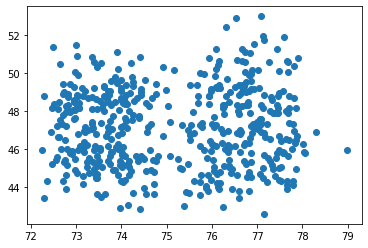

99 	500  	-589.18 	496.668	-2158.69	-0.434382  


In [ ]:
#@title Run the Evolution
random.seed(64)
    
pop = toolbox.population(n=500)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

GEN = 100
best = None

for g in range(GEN):          
  for part in pop:
    part.fitness.values = tuple(np.subtract((0,), toolbox.evaluate(part)))        
    if part.best is None or part.best.fitness < part.fitness:
      part.best = creator.Particle(part)
      part.best.fitness.values = part.fitness.values
    if best is None or best.fitness < part.fitness:
      best = creator.Particle(part)
      best.fitness.values = part.fitness.values
  for part in pop:
    toolbox.update(part, best)
  
  if (g+1) % 10 == 0:
    logbook.record(gen=g, evals=len(pop), **stats.compile(pop))      
    clear_output()
    print(best)
    plot_population(pop) 
    print(logbook.stream)
    time.sleep(1)



In [ ]:
v, a = best
a = a * math.pi / 180  #angle to radians
distance = (2*v**2 * math.sin(a) * math.cos(a))/9.8
print(distance)

574.9961005996289
